In [1]:
from functions import *

from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Serif"],
    "font.size":18})
plt.ion()
import numpy as np

In [2]:
def plot_func(function, nsteps=500):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12,12))
    lower, upper = function.get_bounds()
    assert len(lower)==2, "This function only works with 2D decision spaces."
    # Make data.
    X = np.linspace(lower[0], upper[0], nsteps)
    Y = np.linspace(lower[1], upper[1], nsteps)
    X, Y = np.meshgrid(X, Y)
    Z = np.zeros(X.shape)
    for (i,j),val in np.ndenumerate(X):
        Z[i,j] = function.fitness(np.array([X[i,j], Y[i,j]]))
    
    mx_z = np.max(Z)
    mn_z = np.min(Z)

    p = (mx_z - mn_z)*0.05
    # Plot the surface.
    # surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=False)
    # lw=0.5, rstride=1, cstride=1, alpha=0.5
    surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, lw=0.5, rstride=1, cstride=1, alpha=0.8)
    contour = ax.contour(X, Y, Z, 10, cmap=cm.viridis, linestyles="solid", offset=mn_z-p)
    # ax.contour(X, Y, Z, 10, cmap=cm.viridis, lw=3, colors="k", linestyles="solid", offset=-1)
    # ax.contour(X, Y, Z, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)

    # Customize the z axis.
    # ax.set_zlim(mn_z-p, mx_z)
    ax.zaxis.set_major_locator(LinearLocator(5))
    ax.zaxis.set_ticks([])
    # A StrMethodFormatter is used automatically
    # ax.zaxis.set_major_formatter('{x:.02f}')
    # ax.zaxis.set_major_formatter(xfmt)

    # Add a color bar which maps values to colors.
    # fig.colorbar(surf, pad=0.05, shrink=0.5, aspect=5)
    plt.title(function.__name__)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    ax.set_zlabel("$f(x_1, x_2)$", rotation=0)
    ax.yaxis._axinfo['label']['space_factor'] = 10.0
    plt.tight_layout()
    plt.draw()
    plt.savefig(function.__name__ + ".png")

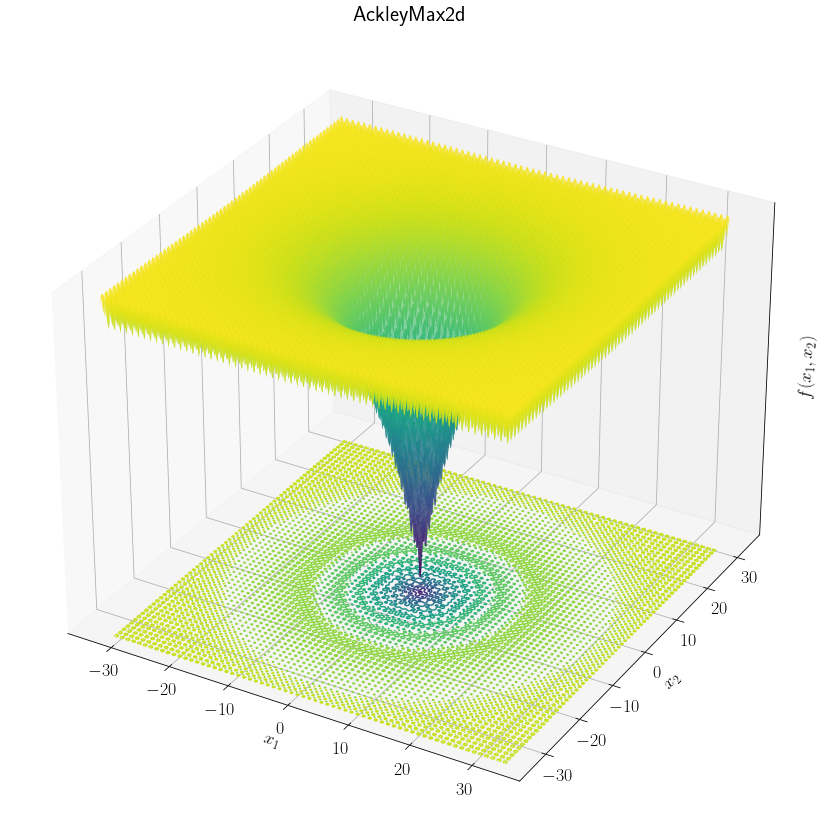

In [3]:
plot_func(AckleyMax2d)

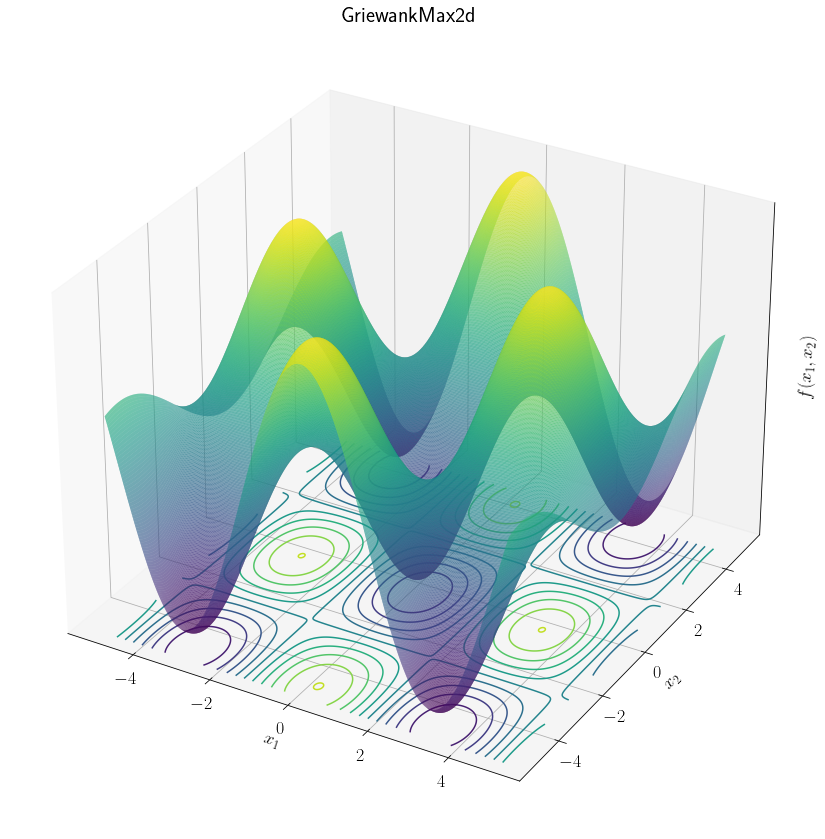

In [4]:
plot_func(GriewankMax2d)

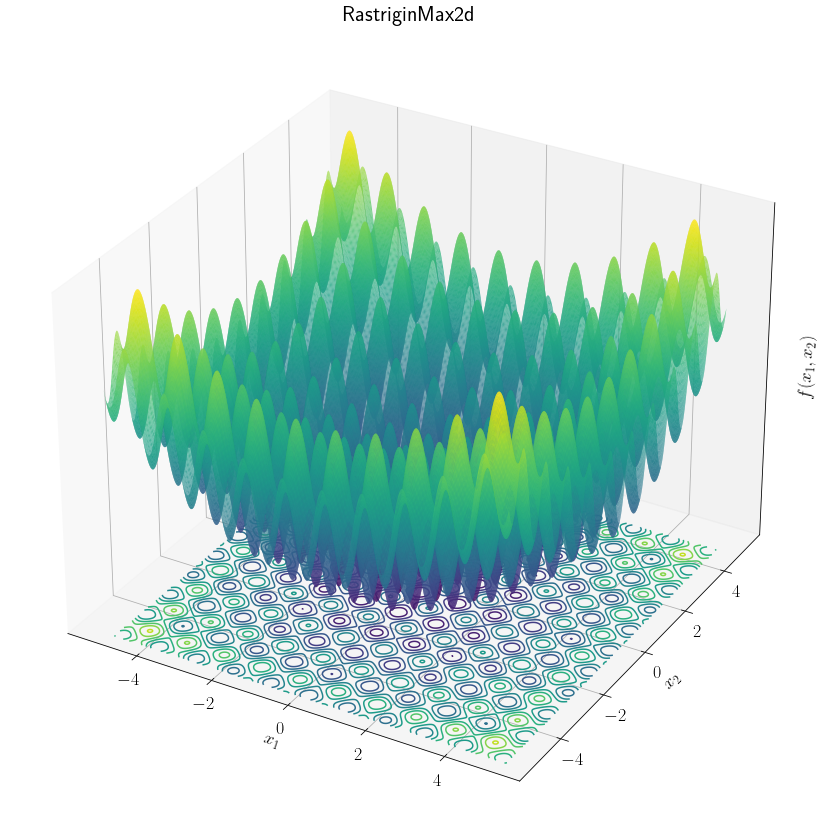

In [5]:
plot_func(RastriginMax2d)

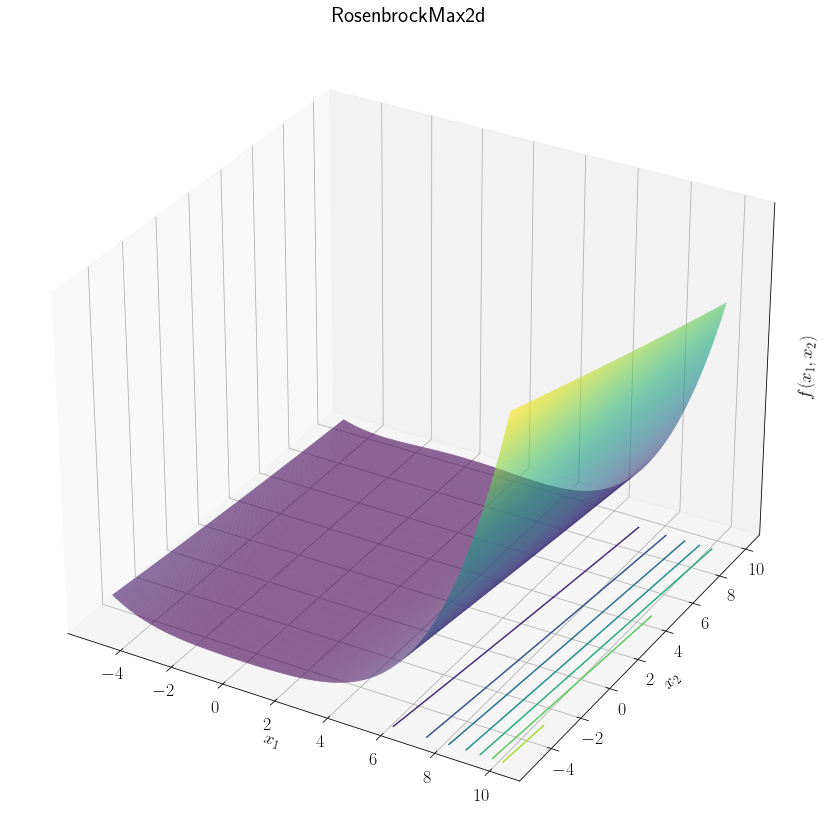

In [6]:
plot_func(RosenbrockMax2d)

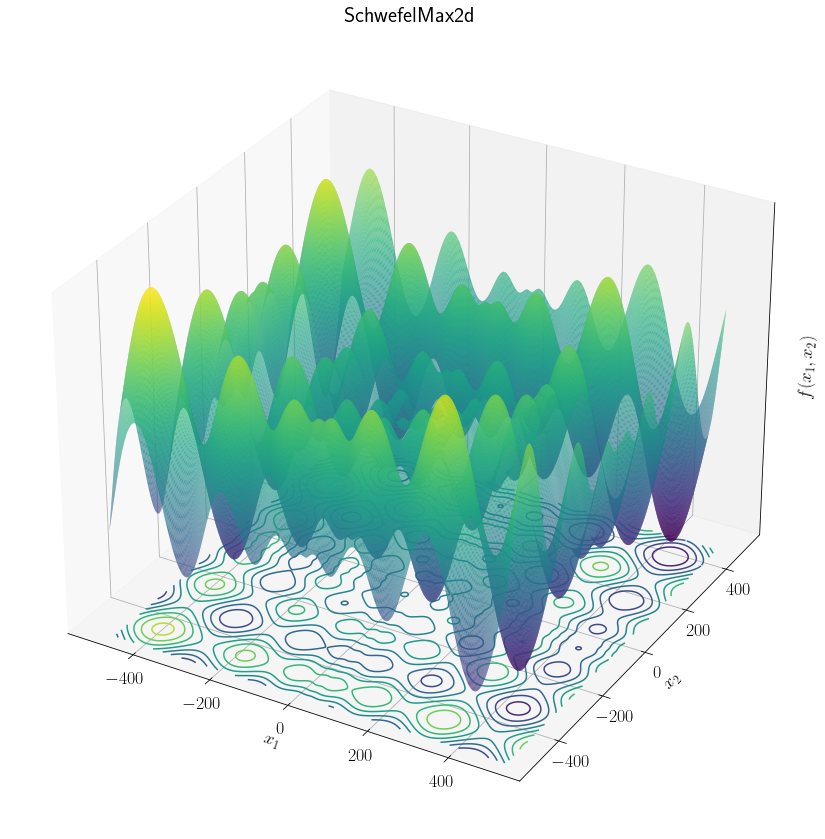

In [7]:
plot_func(SchwefelMax2d)